## 56 - Cross Sections

[Youtube](https://www.youtube.com/watch?v=Eg8HpFpTriw)

## Cross Sections in MetPy

### Basic Cross-Section Example

* Cross Section Plot of 
    * Potential Temperature (contour)
    * RH (contourf)
    * Wind (barbs [vector] and contour [dashed, speed])
* With inset of 500 hPa height field and path

Example available [here](https://unidata.github.io/MetPy/latest/examples/cross_section.html) .

In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import xarray as xr

import metpy.calc as mpcalc
from metpy.cbook import get_test_data
from metpy.interpolate import cross_section
from metpy.units import units

**Getting the data**

This example uses [NARR reanalysis data](
https://www.ncei.noaa.gov/products/weather-climate-models/north-american-regional)
for 18 UTC 04 April 1987 from NCEI.

We use MetPy's CF parsing to get the data ready for use, and squeeze down the size-one time
dimension.



In [2]:
data = xr.open_dataset(get_test_data('narr_example.nc', False))
data = data.metpy.parse_cf().squeeze()
print(data)

<xarray.Dataset>
Dimensions:              (isobaric: 29, y: 118, x: 292)
Coordinates:
    time                 datetime64[ns] 1987-04-04T18:00:00
  * isobaric             (isobaric) float64 1e+03 975.0 950.0 ... 125.0 100.0
  * y                    (y) float64 -3.087e+06 -3.054e+06 ... 7.114e+05
  * x                    (x) float64 -3.977e+06 -3.945e+06 ... 5.47e+06
    metpy_crs            object Projection: lambert_conformal_conic
Data variables:
    Temperature          (isobaric, y, x) float32 ...
    Lambert_Conformal    |S1 ...
    lat                  (y, x) float64 ...
    lon                  (y, x) float64 ...
    u_wind               (isobaric, y, x) float32 ...
    v_wind               (isobaric, y, x) float32 ...
    Geopotential_height  (isobaric, y, x) float32 ...
    Specific_humidity    (isobaric, y, x) float32 ...
Attributes: (12/14)
    Conventions:              CF-1.0
    Originating_center:       US National Weather Service - NCEP(WMC) (7)
    Originating_subcenter

Define start and end points:



In [3]:
start = (37.0, -105.0)
end = (35.5, -65.0)

Get the cross section

In [4]:
cross = cross_section(data, start, end)
print(cross)

<xarray.Dataset>
Dimensions:              (isobaric: 29, index: 100)
Coordinates:
    time                 datetime64[ns] 1987-04-04T18:00:00
  * isobaric             (isobaric) float64 1e+03 975.0 950.0 ... 125.0 100.0
    metpy_crs            object Projection: lambert_conformal_conic
    x                    (index) float64 1.818e+05 2.18e+05 ... 3.712e+06
    y                    (index) float64 -1.454e+06 -1.447e+06 ... -5.573e+05
  * index                (index) int64 0 1 2 3 4 5 6 7 ... 93 94 95 96 97 98 99
Data variables:
    Temperature          (isobaric, index) float64 287.7 286.9 ... 211.4 211.4
    Lambert_Conformal    |S1 ...
    lat                  (index) float64 37.0 37.05 37.11 ... 35.66 35.58 35.5
    lon                  (index) float64 -105.0 -104.6 -104.2 ... -65.39 -65.0
    u_wind               (isobaric, index) float64 -2.729 0.4776 ... 24.6 23.68
    v_wind               (isobaric, index) float64 8.473 5.723 ... -1.082
    Geopotential_height  (isobaric, inde

Convert lat/lon to supplementary coordinates

In [5]:
cross.set_coords(('lat', 'lon'))
print(cross)

<xarray.Dataset>
Dimensions:              (isobaric: 29, index: 100)
Coordinates:
    time                 datetime64[ns] 1987-04-04T18:00:00
  * isobaric             (isobaric) float64 1e+03 975.0 950.0 ... 125.0 100.0
    metpy_crs            object Projection: lambert_conformal_conic
    x                    (index) float64 1.818e+05 2.18e+05 ... 3.712e+06
    y                    (index) float64 -1.454e+06 -1.447e+06 ... -5.573e+05
  * index                (index) int64 0 1 2 3 4 5 6 7 ... 93 94 95 96 97 98 99
Data variables:
    Temperature          (isobaric, index) float64 287.7 286.9 ... 211.4 211.4
    Lambert_Conformal    |S1 ...
    lat                  (index) float64 37.0 37.05 37.11 ... 35.66 35.58 35.5
    lon                  (index) float64 -105.0 -104.6 -104.2 ... -65.39 -65.0
    u_wind               (isobaric, index) float64 -2.729 0.4776 ... 24.6 23.68
    v_wind               (isobaric, index) float64 8.473 5.723 ... -1.082
    Geopotential_height  (isobaric, inde

In [6]:
temperature, pressure, specific_humidity = xr.broadcast(cross['Temperature'], cross['isobaric'], cross['Specific_humidity'])

print('Temperature: ', temperature.shape)
print('Pressure:', pressure.shape)
print('Specific Humidity:', specific_humidity.shape)

Temperature:  (29, 100)
Pressure: (29, 100)
Specific Humidity: (29, 100)


In [7]:
temperature

<xarray.DataArray 'Temperature' (isobaric: 29, index: 100)>
array([[287.71705253, 286.91152777, 287.15642366, ..., 291.44274532,
        291.28206241, 291.06972426],
       [286.2116397 , 285.41183324, 285.65190327, ..., 289.45187816,
        289.31925073, 289.13696351],
       [284.78121444, 283.98550238, 284.23179829, ..., 287.88887928,
        287.77389595, 287.64101356],
       ...,
       [214.99126526, 214.51443992, 214.12664709, ..., 215.84577341,
        215.83606868, 215.83360395],
       [214.13248694, 213.89701345, 213.69232045, ..., 214.23261074,
        214.21223337, 214.18800092],
       [215.32088518, 215.22659179, 215.14108992, ..., 211.49011065,
        211.43875737, 211.39814771]])
Coordinates:
    time       datetime64[ns] 1987-04-04T18:00:00
  * isobaric   (isobaric) float64 1e+03 975.0 950.0 925.0 ... 150.0 125.0 100.0
    metpy_crs  object Projection: lambert_conformal_conic
    x          (index) float64 1.818e+05 2.18e+05 ... 3.676e+06 3.712e+06
    y          (index) float64 -1.454e+06 -1.447e+06 ... -5.684e+05 -5.573e+05
  * index      (index) int64 0 1 2 3 4 5 6 7 8 9 ... 91 92 93 94 95 96 97 98 99
Attributes:
    units:                         K
    long_name:                     Temperature @ isobaric
    grid_mapping:                  Lambert_Conformal
    GRIB_param_name:               Temperature
    GRIB_param_short_name:         TMP
    GRIB_center_id:                7
    GRIB_table_id:                 131
    GRIB_param_number:             11
    GRIB_param_id:                 [  1   7 131  11]
    GRIB_product_definition_type:  Initialized analysis product
    GRIB_level_type:               100
    GRIB_VectorComponentFlag:      gridRelative

In [8]:
theta = mpcalc.potential_temperature(pressure * units.hPa, temperature * units.kelvin)
rh = mpcalc.relative_humidity_from_specific_humidity(pressure * units.hPa, temperature * units.kelvin, specific_humidity)

print(theta)
print(rh)

<xarray.DataArray (isobaric: 29, index: 100)>
<Quantity([[287.71705253 286.91152777 287.15642366 ... 291.44274532 291.28206241
  291.06972426]
 [288.28950345 287.48389048 287.72570339 ... 291.55326567 291.41967537
  291.23606477]
 [288.98547975 288.17802048 288.4279525  ... 292.13902349 292.02234265
  291.8874985 ]
 ...
 [369.67775066 368.8578489  368.19103863 ... 371.1470785  371.13039122
  371.1261531 ]
 [387.88972142 387.46317359 387.09238301 ... 388.07109041 388.03417788
  387.99028208]
 [415.71954399 415.53749196 415.37241371 ... 408.32347631 408.22432866
  408.14592368]], 'kelvin')>
Coordinates:
    time       datetime64[ns] 1987-04-04T18:00:00
  * isobaric   (isobaric) float64 1e+03 975.0 950.0 925.0 ... 150.0 125.0 100.0
    metpy_crs  object Projection: lambert_conformal_conic
    x          (index) float64 1.818e+05 2.18e+05 ... 3.676e+06 3.712e+06
    y          (index) float64 -1.454e+06 -1.447e+06 ... -5.684e+05 -5.573e+05
  * index      (index) int64 0 1 2 3 4 5 6 7 8 9 .

In [9]:
cross['Potential_temperature'] = xr.DataArray(theta, coords = temperature.coords, dims = temperature.dims, attrs = {'units': theta.data.units})

cross['Relative_humidity'] = xr.DataArray(rh, coords = specific_humidity.coords, dims = specific_humidity.dims, attrs = {'units': rh.data.units})

In [10]:
cross['u_wind'] = cross['u_wind'].metpy.convert_units('knots')
cross['v_wind'] = cross['v_wind'].metpy.convert_units('knots')
cross['t_wind'], cross['n_wind'] = mpcalc.cross_section_components(cross['u_wind'], cross['v_wind'])

print(cross)

<xarray.Dataset>
Dimensions:                (isobaric: 29, index: 100)
Coordinates:
    time                   datetime64[ns] 1987-04-04T18:00:00
  * isobaric               (isobaric) float64 1e+03 975.0 950.0 ... 125.0 100.0
    metpy_crs              object Projection: lambert_conformal_conic
    x                      (index) float64 1.818e+05 2.18e+05 ... 3.712e+06
    y                      (index) float64 -1.454e+06 -1.447e+06 ... -5.573e+05
  * index                  (index) int64 0 1 2 3 4 5 6 ... 93 94 95 96 97 98 99
Data variables:
    Temperature            (isobaric, index) float64 287.7 286.9 ... 211.4 211.4
    Lambert_Conformal      |S1 ...
    lat                    (index) float64 37.0 37.05 37.11 ... 35.66 35.58 35.5
    lon                    (index) float64 -105.0 -104.6 -104.2 ... -65.39 -65.0
    u_wind                 (isobaric, index) float64 <Quantity([[ -5.30445235...
    v_wind                 (isobaric, index) float64 <Quantity([[16.47047637 ...
    Geopoten

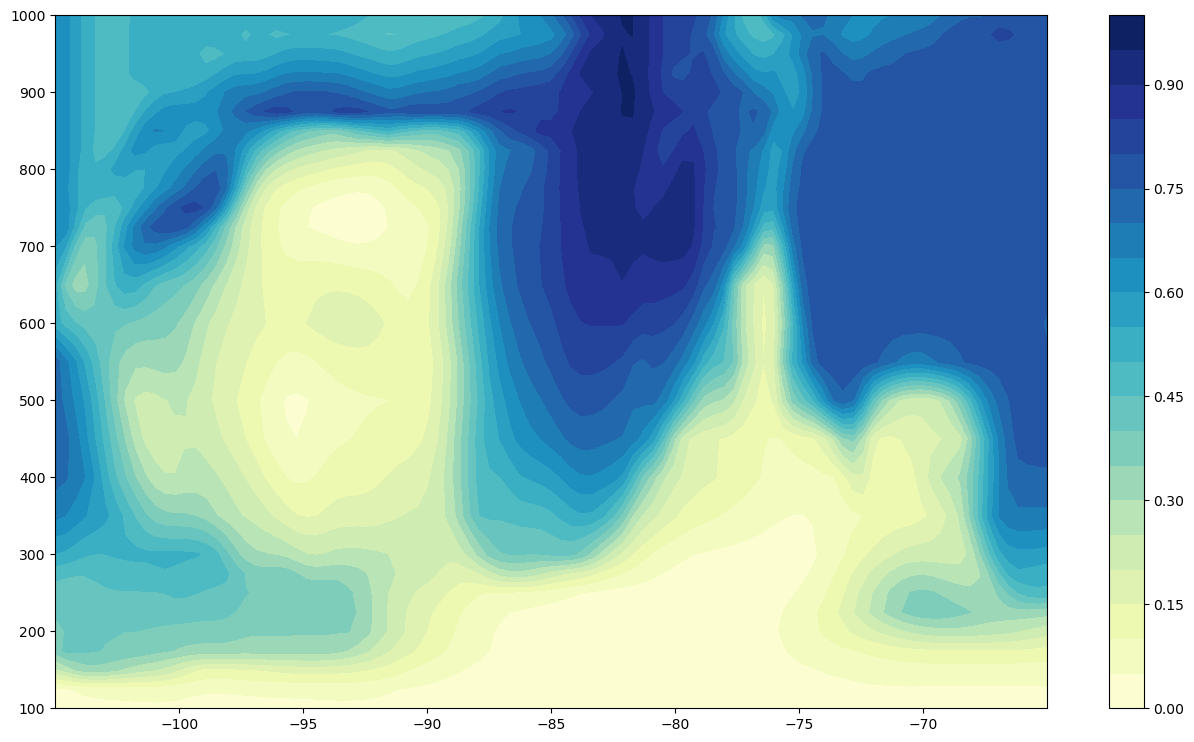

In [11]:
# Define the figure object and primary axes
fig = plt.figure(1, figsize=(16., 9.))
ax = plt.axes()

# Plot RH using contourf
rh_contour = ax.contourf(cross['lon'], cross['isobaric'], cross['Relative_humidity'],
                         levels=np.arange(0, 1.05, .05), cmap='YlGnBu')
rh_colorbar = fig.colorbar(rh_contour)

plt.show()

/tmp/ipykernel_1205184/3823586750.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(np.arange(1000, 50, -100))


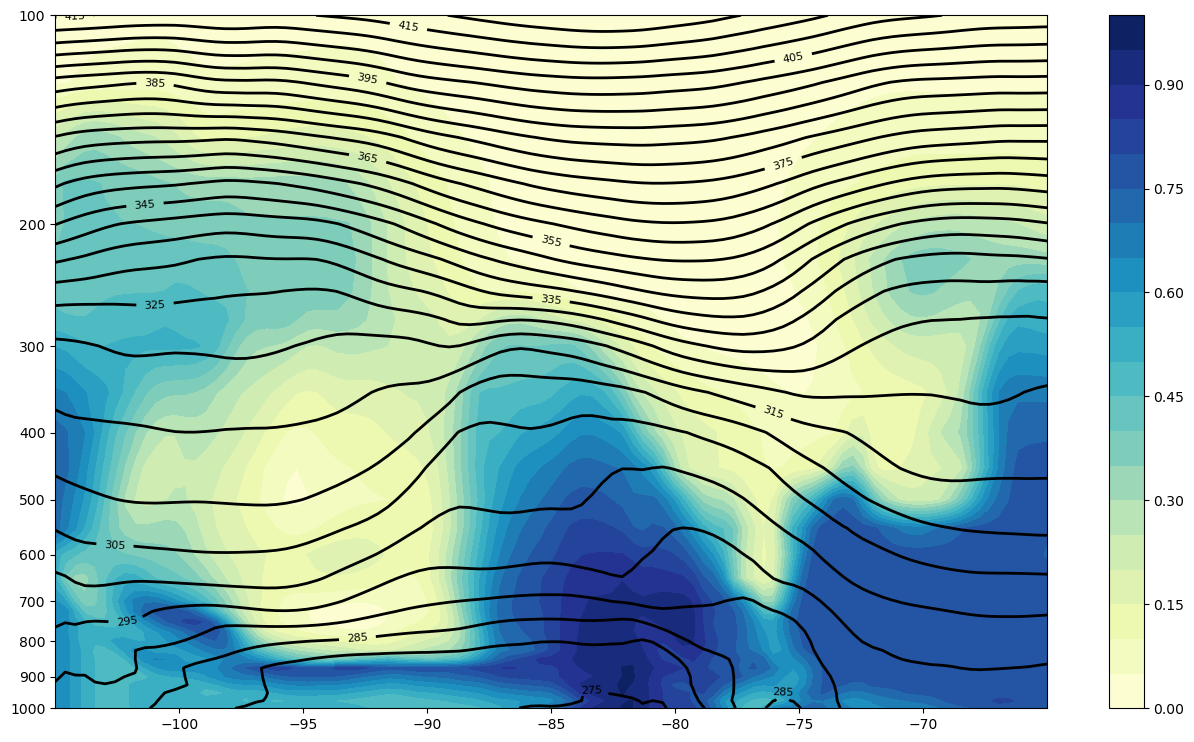

In [12]:
# Define the figure object and primary axes
fig = plt.figure(1, figsize=(16., 9.))
ax = plt.axes()

# Plot RH using contourf
rh_contour = ax.contourf(cross['lon'], cross['isobaric'], cross['Relative_humidity'],
                         levels=np.arange(0, 1.05, .05), cmap='YlGnBu')
rh_colorbar = fig.colorbar(rh_contour)

# Plot potential temperature using contour, with some custom labeling
theta_contour = ax.contour(cross['lon'], cross['isobaric'], cross['Potential_temperature'],
                           levels=np.arange(250, 450, 5), colors='k', linewidths=2)
theta_contour.clabel(theta_contour.levels[1::2], fontsize=8, colors='k', inline=1,
                     inline_spacing=8, fmt='%i', rightside_up=True, use_clabeltext=True)

# Adjust the y-axis to be logarithmic
ax.set_yscale('symlog')
ax.set_yticklabels(np.arange(1000, 50, -100))
ax.set_ylim(cross['isobaric'].max(), cross['isobaric'].min())
ax.set_yticks(np.arange(1000, 50, -100))

plt.show()

/tmp/ipykernel_1205184/1443214505.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(np.arange(1000, 50, -100))


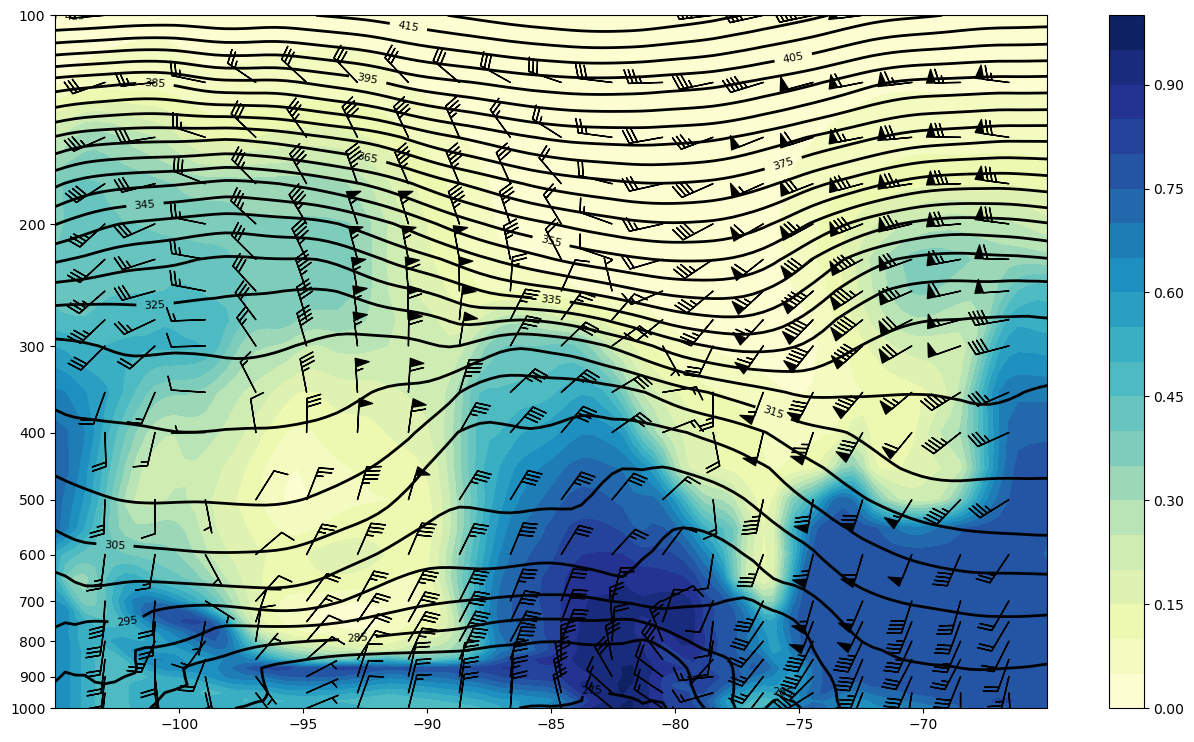

In [13]:
# Define the figure object and primary axes
fig = plt.figure(1, figsize=(16., 9.))
ax = plt.axes()

# Plot RH using contourf
rh_contour = ax.contourf(cross['lon'], cross['isobaric'], cross['Relative_humidity'],
                         levels=np.arange(0, 1.05, .05), cmap='YlGnBu')
rh_colorbar = fig.colorbar(rh_contour)

# Plot potential temperature using contour, with some custom labeling
theta_contour = ax.contour(cross['lon'], cross['isobaric'], cross['Potential_temperature'],
                           levels=np.arange(250, 450, 5), colors='k', linewidths=2)
theta_contour.clabel(theta_contour.levels[1::2], fontsize=8, colors='k', inline=1,
                     inline_spacing=8, fmt='%i', rightside_up=True, use_clabeltext=True)

# Plot winds using the axes interface directly, with some custom indexing to make the barbs
# less crowded
wind_slc_vert = list(range(0, 19, 2)) + list(range(19, 29))
wind_slc_horz = slice(5, 100, 5)
ax.barbs(cross['lon'][wind_slc_horz], cross['isobaric'][wind_slc_vert],
         cross['t_wind'][wind_slc_vert, wind_slc_horz],
         cross['n_wind'][wind_slc_vert, wind_slc_horz], color='k')

# Adjust the y-axis to be logarithmic
ax.set_yscale('symlog')
ax.set_yticklabels(np.arange(1000, 50, -100))
ax.set_ylim(cross['isobaric'].max(), cross['isobaric'].min())
ax.set_yticks(np.arange(1000, 50, -100))

plt.show()

/tmp/ipykernel_1205184/2433389869.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(np.arange(1000, 50, -100))


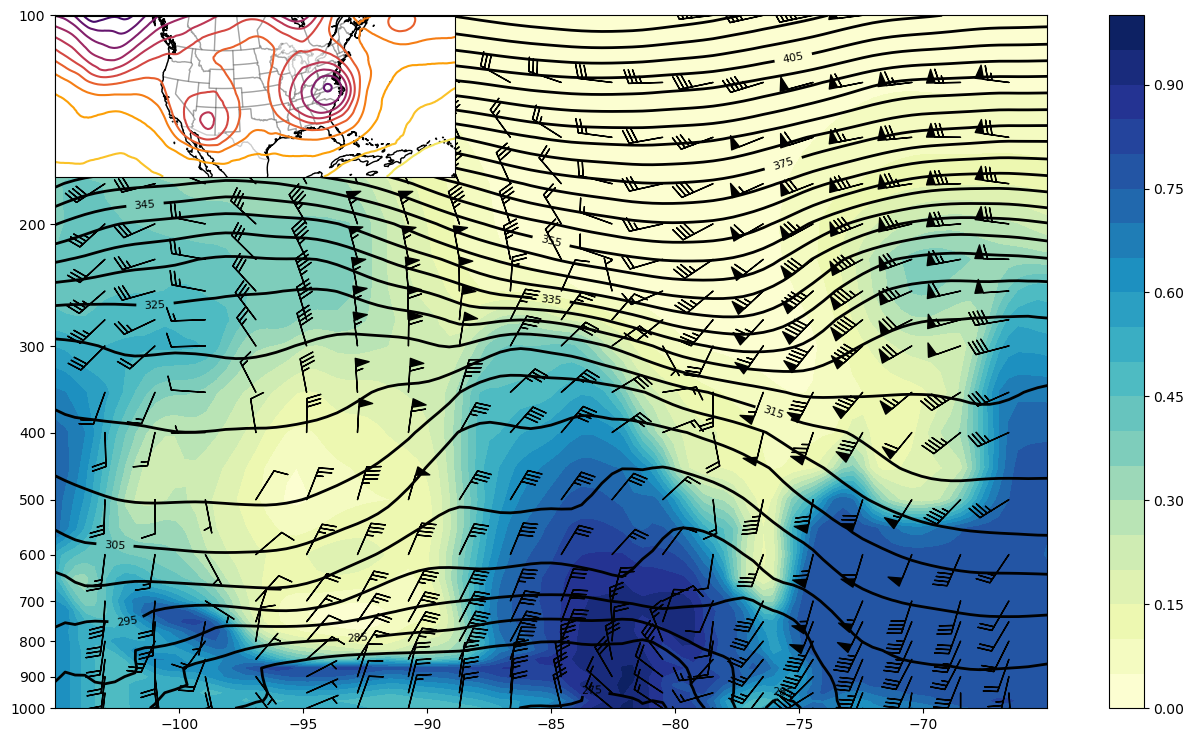

In [14]:
# Define the figure object and primary axes
fig = plt.figure(1, figsize=(16., 9.))
ax = plt.axes()

# Plot RH using contourf
rh_contour = ax.contourf(cross['lon'], cross['isobaric'], cross['Relative_humidity'],
                         levels=np.arange(0, 1.05, .05), cmap='YlGnBu')
rh_colorbar = fig.colorbar(rh_contour)

# Plot potential temperature using contour, with some custom labeling
theta_contour = ax.contour(cross['lon'], cross['isobaric'], cross['Potential_temperature'],
                           levels=np.arange(250, 450, 5), colors='k', linewidths=2)
theta_contour.clabel(theta_contour.levels[1::2], fontsize=8, colors='k', inline=1,
                     inline_spacing=8, fmt='%i', rightside_up=True, use_clabeltext=True)

# Plot winds using the axes interface directly, with some custom indexing to make the barbs
# less crowded
wind_slc_vert = list(range(0, 19, 2)) + list(range(19, 29))
wind_slc_horz = slice(5, 100, 5)
ax.barbs(cross['lon'][wind_slc_horz], cross['isobaric'][wind_slc_vert],
         cross['t_wind'][wind_slc_vert, wind_slc_horz],
         cross['n_wind'][wind_slc_vert, wind_slc_horz], color='k')

# Adjust the y-axis to be logarithmic
ax.set_yscale('symlog')
ax.set_yticklabels(np.arange(1000, 50, -100))
ax.set_ylim(cross['isobaric'].max(), cross['isobaric'].min())
ax.set_yticks(np.arange(1000, 50, -100))

# Define the CRS and inset axes
data_crs = data['Geopotential_height'].metpy.cartopy_crs
ax_inset = fig.add_axes([0.125, 0.665, 0.25, 0.25], projection=data_crs)

# Plot geopotential height at 500 hPa using xarray's contour wrapper
ax_inset.contour(data['x'], data['y'], data['Geopotential_height'].sel(isobaric=500.),
                 levels=np.arange(5100, 6000, 60), cmap='inferno')

# Add geographic features
ax_inset.coastlines()
ax_inset.add_feature(cfeature.STATES.with_scale('50m'), edgecolor='k', alpha=0.2, zorder=0)

plt.show()

/tmp/ipykernel_1205184/2682074994.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(np.arange(1000, 50, -100))


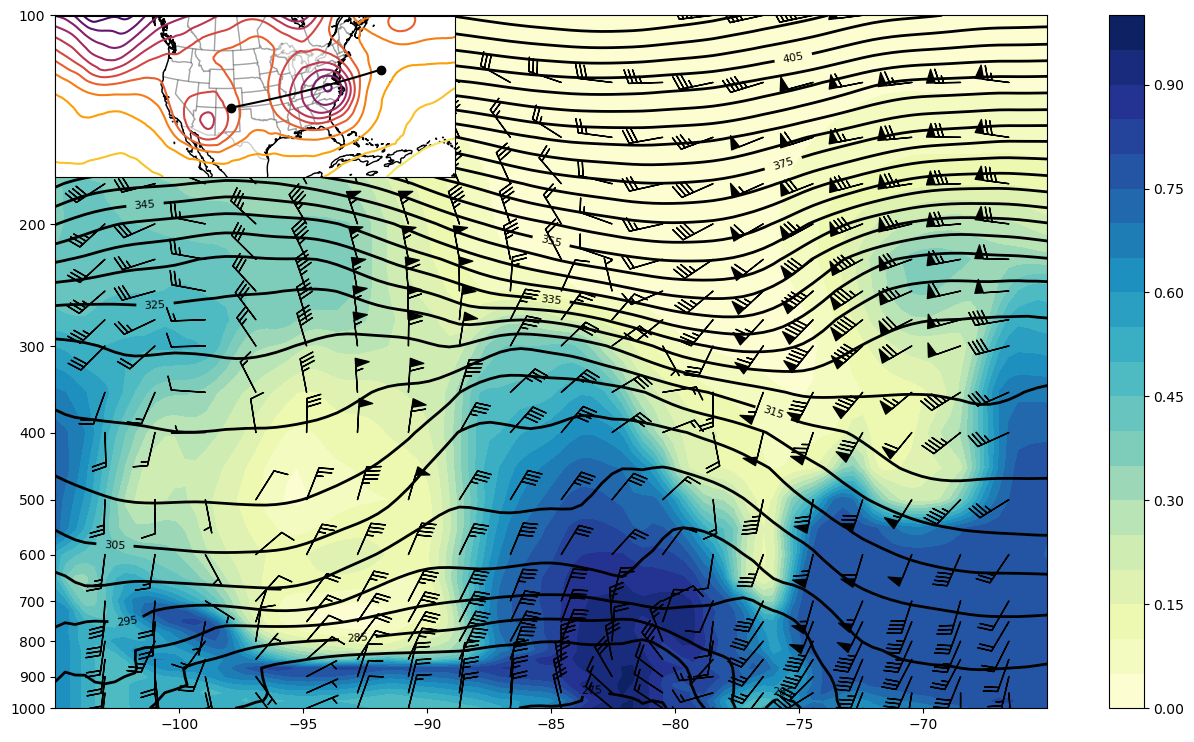

In [15]:
# Define the figure object and primary axes
fig = plt.figure(1, figsize=(16., 9.))
ax = plt.axes()

# Plot RH using contourf
rh_contour = ax.contourf(cross['lon'], cross['isobaric'], cross['Relative_humidity'],
                         levels=np.arange(0, 1.05, .05), cmap='YlGnBu')
rh_colorbar = fig.colorbar(rh_contour)

# Plot potential temperature using contour, with some custom labeling
theta_contour = ax.contour(cross['lon'], cross['isobaric'], cross['Potential_temperature'],
                           levels=np.arange(250, 450, 5), colors='k', linewidths=2)
theta_contour.clabel(theta_contour.levels[1::2], fontsize=8, colors='k', inline=1,
                     inline_spacing=8, fmt='%i', rightside_up=True, use_clabeltext=True)

# Plot winds using the axes interface directly, with some custom indexing to make the barbs
# less crowded
wind_slc_vert = list(range(0, 19, 2)) + list(range(19, 29))
wind_slc_horz = slice(5, 100, 5)
ax.barbs(cross['lon'][wind_slc_horz], cross['isobaric'][wind_slc_vert],
         cross['t_wind'][wind_slc_vert, wind_slc_horz],
         cross['n_wind'][wind_slc_vert, wind_slc_horz], color='k')

# Adjust the y-axis to be logarithmic
ax.set_yscale('symlog')
ax.set_yticklabels(np.arange(1000, 50, -100))
ax.set_ylim(cross['isobaric'].max(), cross['isobaric'].min())
ax.set_yticks(np.arange(1000, 50, -100))

# Define the CRS and inset axes
data_crs = data['Geopotential_height'].metpy.cartopy_crs
ax_inset = fig.add_axes([0.125, 0.665, 0.25, 0.25], projection=data_crs)

# Plot geopotential height at 500 hPa using xarray's contour wrapper
ax_inset.contour(data['x'], data['y'], data['Geopotential_height'].sel(isobaric=500.),
                 levels=np.arange(5100, 6000, 60), cmap='inferno')

# Plot the path of the cross section
endpoints = data_crs.transform_points(ccrs.Geodetic(),
                                      *np.vstack([start, end]).transpose()[::-1])
ax_inset.scatter(endpoints[:, 0], endpoints[:, 1], c='k', zorder=2)
ax_inset.plot(cross['x'], cross['y'], c='k', zorder=2)

# Add geographic features
ax_inset.coastlines()
ax_inset.add_feature(cfeature.STATES.with_scale('50m'), edgecolor='k', alpha=0.2, zorder=0)

plt.show()

/tmp/ipykernel_1205184/1529309140.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(np.arange(1000, 50, -100))


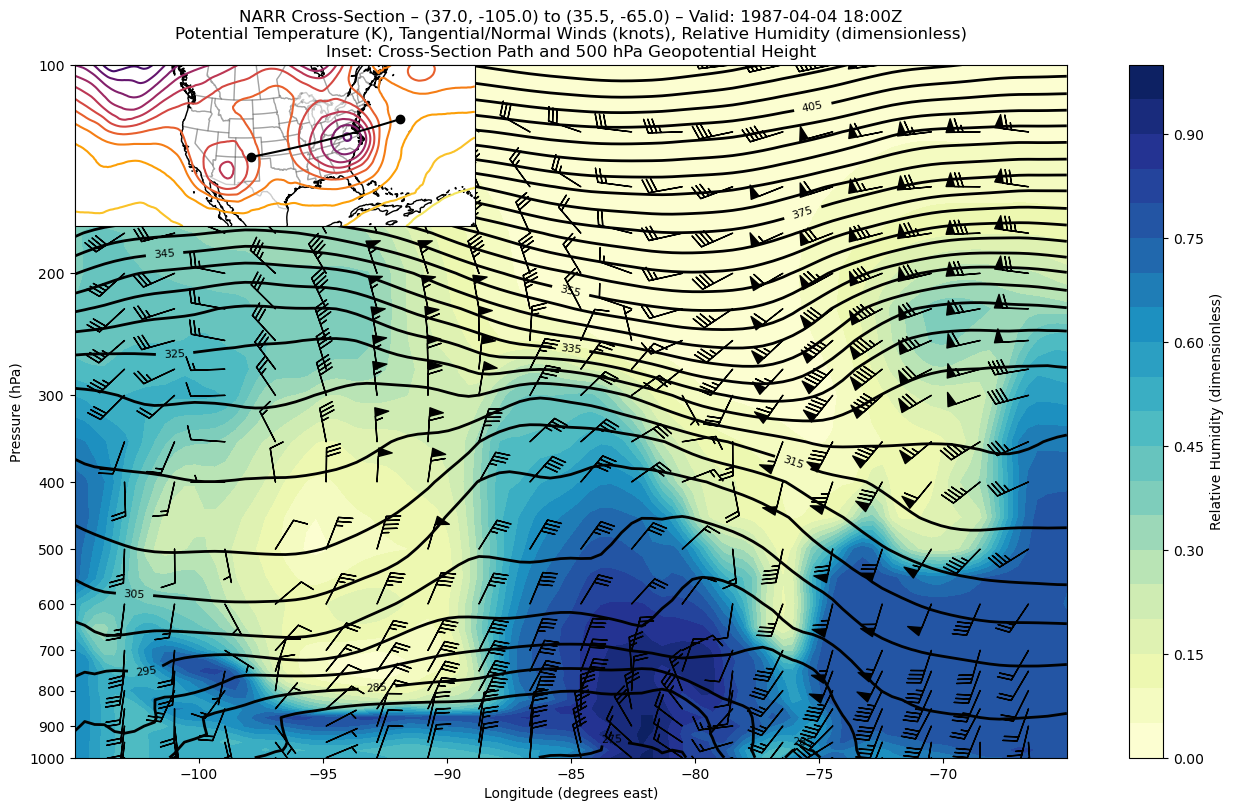

In [16]:
# Define the figure object and primary axes
fig = plt.figure(1, figsize=(16., 9.))
ax = plt.axes()

# Plot RH using contourf
rh_contour = ax.contourf(cross['lon'], cross['isobaric'], cross['Relative_humidity'],
                         levels=np.arange(0, 1.05, .05), cmap='YlGnBu')
rh_colorbar = fig.colorbar(rh_contour)

# Plot potential temperature using contour, with some custom labeling
theta_contour = ax.contour(cross['lon'], cross['isobaric'], cross['Potential_temperature'],
                           levels=np.arange(250, 450, 5), colors='k', linewidths=2)
theta_contour.clabel(theta_contour.levels[1::2], fontsize=8, colors='k', inline=1,
                     inline_spacing=8, fmt='%i', rightside_up=True, use_clabeltext=True)

# Plot winds using the axes interface directly, with some custom indexing to make the barbs
# less crowded
wind_slc_vert = list(range(0, 19, 2)) + list(range(19, 29))
wind_slc_horz = slice(5, 100, 5)
ax.barbs(cross['lon'][wind_slc_horz], cross['isobaric'][wind_slc_vert],
         cross['t_wind'][wind_slc_vert, wind_slc_horz],
         cross['n_wind'][wind_slc_vert, wind_slc_horz], color='k')

# Adjust the y-axis to be logarithmic
ax.set_yscale('symlog')
ax.set_yticklabels(np.arange(1000, 50, -100))
ax.set_ylim(cross['isobaric'].max(), cross['isobaric'].min())
ax.set_yticks(np.arange(1000, 50, -100))

# Define the CRS and inset axes
data_crs = data['Geopotential_height'].metpy.cartopy_crs
ax_inset = fig.add_axes([0.125, 0.665, 0.25, 0.25], projection=data_crs)

# Plot geopotential height at 500 hPa using xarray's contour wrapper
ax_inset.contour(data['x'], data['y'], data['Geopotential_height'].sel(isobaric=500.),
                 levels=np.arange(5100, 6000, 60), cmap='inferno')

# Plot the path of the cross section
endpoints = data_crs.transform_points(ccrs.Geodetic(),
                                      *np.vstack([start, end]).transpose()[::-1])
ax_inset.scatter(endpoints[:, 0], endpoints[:, 1], c='k', zorder=2)
ax_inset.plot(cross['x'], cross['y'], c='k', zorder=2)

# Add geographic features
ax_inset.coastlines()
ax_inset.add_feature(cfeature.STATES.with_scale('50m'), edgecolor='k', alpha=0.2, zorder=0)

# Set the titles and axes labels
ax_inset.set_title('')
ax.set_title(f'NARR Cross-Section \u2013 {start} to {end} \u2013 '
             f'Valid: {cross["time"].dt.strftime("%Y-%m-%d %H:%MZ").item()}\n'
             'Potential Temperature (K), Tangential/Normal Winds (knots), Relative Humidity '
             '(dimensionless)\nInset: Cross-Section Path and 500 hPa Geopotential Height')
ax.set_ylabel('Pressure (hPa)')
ax.set_xlabel('Longitude (degrees east)')
rh_colorbar.set_label('Relative Humidity (dimensionless)')

plt.show()